In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# reshape for CNN: (samples, height, width, channels)
# also normalize to [0,1]

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test.shape

(10000, 28, 28, 1)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

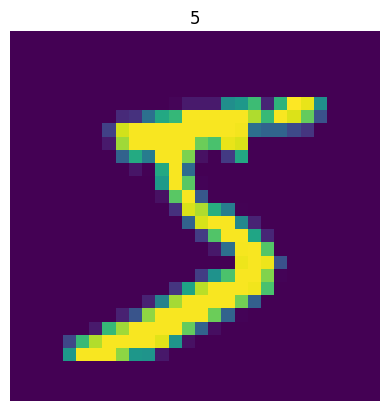

In [10]:
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.axis('off')
plt.show()

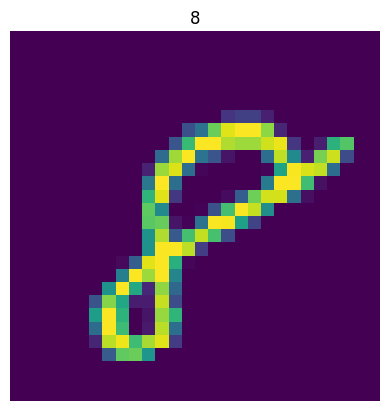

In [11]:
plt.imshow(X_train[-1])
plt.title(y_train[-1])
plt.axis('off')
plt.show()

In [12]:
# build the CNN model

model = Sequential()

# 1st Convolution + Pooling
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution + Pooling
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten before dense layers
model.add(Flatten())

# fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=128, verbose=1)

Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3195 - accuracy: 0.9024 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0895 - accuracy: 0.9731 - val_loss: 0.0436 - val_accuracy: 0.9878
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0625 - accuracy: 0.9819 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0485 - accuracy: 0.9856 - val_loss: 0.0363 - val_accuracy: 0.9907
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0325 - val_accuracy: 0.9905
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0352 - val_accuracy: 0.9887
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9915
Test accuracy: 0.9915000200271606
Test loss: 0.029164738953113556


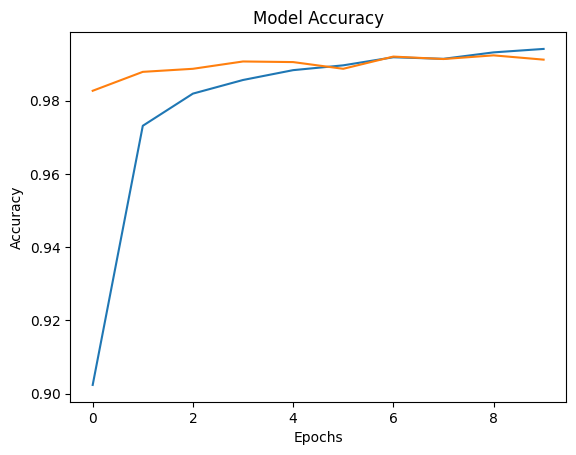

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

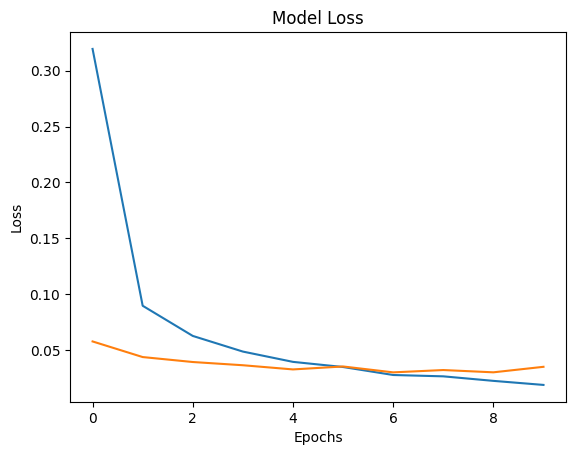

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [19]:
# get model predictions for test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 0s 1ms/step


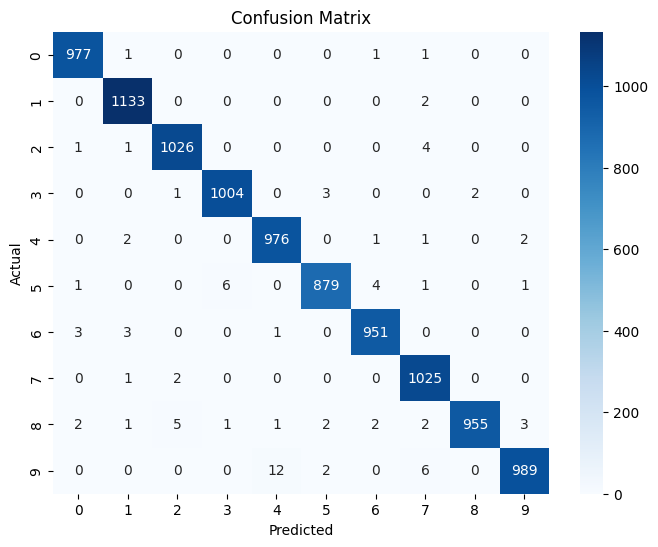

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



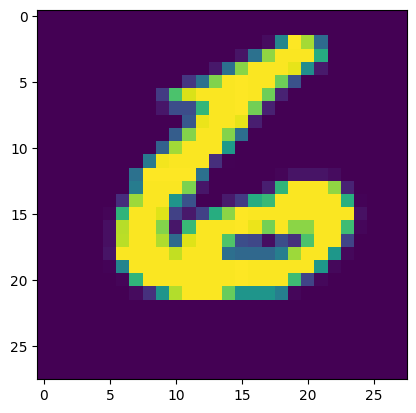

In [22]:
# predict output for one test image
plt.imshow(X_test[-1])
plt.show()

In [23]:
prediction = np.argmax(model.predict(np.expand_dims(X_test[-1], axis=0)))

1/1 [==============================] - 0s 30ms/step


In [24]:
print('Predicted digit:', prediction)
print('Actual digit:', y_test[-1])

Predicted digit: 6
Actual digit: 6
